# Analiza podatkov o 3050 največjih smučiščih na svetu

Najprej naložimo ustrezne pakete ter razpredelnico, ki jo bomo uporabili za analizo podatkov.

In [172]:
# naložimo paket
import pandas as pd

# naložimo razpredelnico, s katero bomo delali
smucisca = pd.read_csv(r'C:\Users\Nejc\AnalizaBesed\ProjektnaNaloga2024\smucisca.csv', index_col='položaj')

# ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 20 vrstic
pd.options.display.max_rows = 22

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns


Spodaj je prikazana razpredelnica s podatki. Najprej je prikazan položaj smučišča na svetovni lestvici, urejeni po velikosti smučišč. Ta podatek sem nastavil za index. Potem je ime smučišča, celina in država, v kateri se nahaja. Sledijo še številski podatki: ocena(od 0 do 5), višinska razlika(izraženo v metrih), podatki o skupni dolžini prog, o dolžini modrih, rdečih in črnih prog posamično(izraženo v kilometrih) in skupno število žičnic. Kjer ni bilo podanega podatka, je nastavljeno na vrednost 'no data'. Ker pri smučiščih v Rusiji celina ni bila podana, sem le to nastavil na 'Europe/Asia'.

In [173]:
smucisca

,ime,celina,država,ocena,višinska_razlika,proge,modre,rdeče,črne,žičnice
položaj,,,,,,,,,,
1,Les 3 Vallées – Val Thorens/Les Menuires/Mérib...,Europe,France,4.6,2130.0,600.0,312.0,216.0,72.0,157
2,Les Portes du Soleil – Morzine/Avoriaz/Les Get...,Europe,Switzerland,4.3,1269.0,580.0,310.0,210.0,60.0,165
3,4 Vallées – Verbier/La Tzoumaz/Nendaz/Veysonna...,Europe,Switzerland,4.3,1980.0,412.0,107.0,202.0,103.0,68
4,Via Lattea – Sestriere/Sauze d’Oulx/San Sicari...,Europe,Italy,4.2,1251.0,400.0,96.0,220.0,84.0,70
5,Zermatt/Breuil-Cervinia/Valtournenche – Matter...,Europe,Switzerland,4.5,2337.0,322.0,75.0,220.0,27.0,51
...,...,...,...,...,...,...,...,...,...,...
3038,Schwengimatt,Europe,Switzerland,2.2,117.0,1.7,1.0,0.5,0.2,no data
3038,Siplo,Europe,Norway,2.2,285.0,1.7,0.6,0.4,0.7,2
3038,Prácheň,Europe,Czech Republic,2.2,106.0,1.7,0.7,0.6,0.4,no data


# <h2>1. Analiza</h2>

# <h3>1.1 Celine</h3>


Najprej bomo analizirali smučarske centre po celinah.

Opazimo lahko, da je celina z največ smučišči Evropa. Po številu teh močno izstopa, saj jih ima več kot ostale celine skupno. Celina z najmanj smučišči pa je Afrika. To je pričakovano zaradi nižje razvitosti in visokih temperatur.

Tu je prikazano nekaj največjih smučišč iz Evrope ter vsa iz Afrike. Opazimo, da so največja smučišča sveta vsa v Evropi ter da so Afriška izredno kratka.

In [174]:
smucisca[smucisca['celina'] == 'Europe/Asia'][['ime', 'proge']].head(60)


,ime,proge
položaj,,
96,Rosa Khutor,102.0
230,Gazprom Mountain Resort,52.8
465,Krasnaya Polyana Resort,30.0
465,Kolasportland,30.0
545,Big Wood,26.7
...,...,...
2307,Pavlovka,3.4
2355,Wolf Mountain – Volchikha (Rewda),3.1
2372,Tyagatchev's Mountain – Shukolovo,3.0


In [175]:
smucisca[smucisca['celina'] == 'Africa'][['ime', 'proge']]

,ime,proge
položaj,,
1215,Oukaïmeden,10.0
2687,Tiffindell,2.4
2799,Polana Sosny – Niedzica,2.0
2799,Matroosberg,2.0
2982,Afriski Mountain Resort,1.8


# <h3>1.2 Države</h3>


Za začetek tega razdelka si oglejmo države z največ registriranimi smučišči. Prikazano je tudi v obliki stolpičnega diagrama.

In [176]:
# preštejemo smučišča za vsako državo
smucisca_po_drzavah = smucisca.groupby('država').size().reset_index(name='število_smučišč')

# uredimo po številu smučišč od največ do najmanj
smucisca_po_drzavah = smucisca_po_drzavah.sort_values(by='število_smučišč', ascending=False)

# nastavimo indeks
smucisca_po_drzavah.reset_index(drop=True, inplace=True)
smucisca_po_drzavah.index += 1  # Indeks začne od 1

# prikažemo prvih 10 držav
najvec_smucisc = smucisca_po_drzavah.head(10)
najvec_smucisc


,država,število_smučišč
1,USA,415
2,Japan,321
3,Austria,251
4,Italy,215
5,Switzerland,212
6,France,206
7,Canada,191
8,Germany,145
9,Norway,130
10,Czech Republic,114


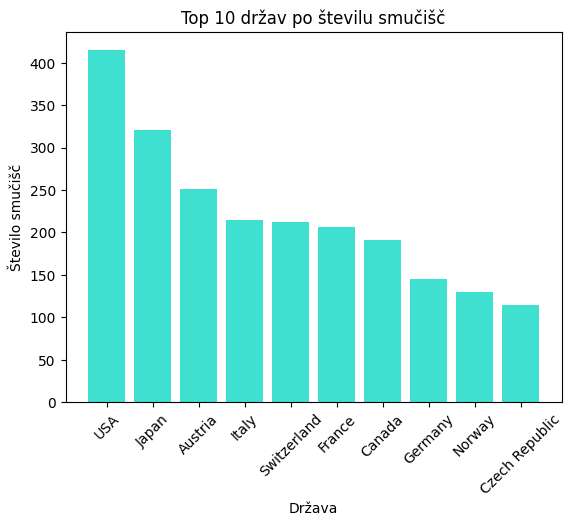

<Figure size 1000x600 with 0 Axes>

In [211]:
# ustvarimo stolpični diagram
plt.bar(najvec_smucisc['država'], najvec_smucisc['število_smučišč'], color='turquoise')

# dodamo oznake in naslov
plt.xlabel('Država')
plt.ylabel('Število smučišč')
plt.title('Top 10 držav po številu smučišč')

# rotiramo oznake na x-osi
plt.xticks(rotation=45)
plt.figure(figsize=(10, 6))
plt.show()

Sedaj nas zanimajo države z najdaljšo skupno dolžino smučarskih prog.

In [214]:
# skupna dolžina prog po državah
dolzina_prog_po_drzavah = smucisca.groupby('država')['proge'].sum()

# uredimo po skupni dolžini prog od največ do najmanj
dolzina_prog_po_drzavah = dolzina_prog_po_drzavah.sort_values(ascending=False)

# nastavimo indeks, da začne od 1
dolzina_prog_po_drzavah = dolzina_prog_po_drzavah.reset_index()
dolzina_prog_po_drzavah.index += 1  

najdaljse_dolzina = dolzina_prog_po_drzavah.head(10)
najdaljse_dolzina



,država,proge
1,USA,11133.8
2,France,9080.6
3,Austria,7101.0
4,Switzerland,6659.4
5,Italy,5171.5
6,Canada,3986.8
7,Japan,3028.0
8,Norway,1365.3
9,Spain,1178.4
10,Sweden,1122.4


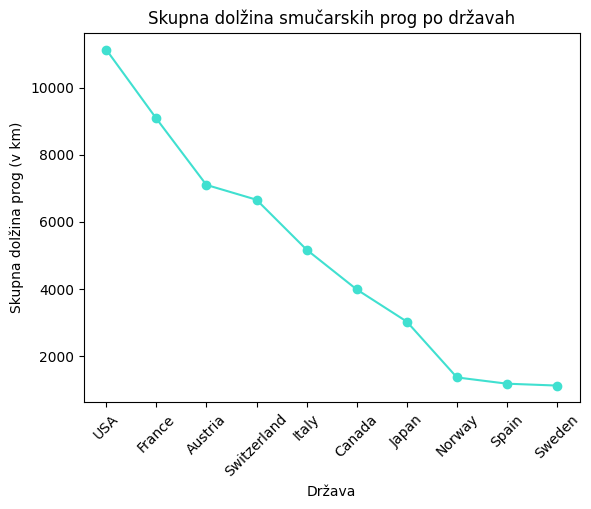

In [217]:
plt.plot(najdaljse_dolzina['država'], najdaljse_dolzina['proge'], marker='o', color='turquoise')
plt.title('Skupna dolžina smučarskih prog po državah')
plt.xlabel('Država')
plt.ylabel('Skupna dolžina prog (v km)')
plt.xticks(rotation=45)
plt.show()


Če primerjamo ta dva grafa, opazimo, da imajo ZDA največ smučišč in najdaljšo skupno dolžino prog, Francija pa ima manj zelo dolgih smučišč, saj je po številu smučišč šele na 6. mestu, po dolžini prog pa se nahaja tik za ZDA.

Naslednji podatek, ki si ga bomo ogledali, je tak, da koristi najizkušenejšim smučarjem. Ogledali si bomo namreč seznam držav z največ najzahtevnejšimi progami, torej črnimi. Hkrati pa bomo še preračunali, kolikšen procent vseh prog zavzemajo najtežje.

Za manj izkušene smučarje še sedaj podatke o lažjih, torej modrih in rdečih progah.

# <h3>1.3 Slovenska smučišča</h3>


_V tem razdelku bom natančno obdelal podatke o smučiščih, izključno v Sloveniji. Ker je teh zelo malo, bo analiza kratka._

Najprej je prikazana razpredelnica slovenskih smučišč.

In [178]:
slovenska_smucisca = smucisca[smucisca['država']== 'Slovenia']
slovenska_smucisca.head(22)

,ime,celina,država,ocena,višinska_razlika,proge,modre,rdeče,črne,žičnice
položaj,,,,,,,,,,
392,Mariborsko Pohorje – Maribor,Europe,Slovenia,3.1,999.0,35.0,20.0,12.0,3.0,14
465,Krvavec,Europe,Slovenia,3.5,521.0,30.0,7.0,15.0,8.0,13
465,Kanin – Sella Nevea/Bovec,Europe,Slovenia,3.2,1189.0,30.0,6.0,22.0,2.0,10
647,Vogel – Bohinj,Europe,Slovenia,3.6,1231.0,22.0,9.5,12.5,0.0,9
692,Kranjska Gora,Europe,Slovenia,2.8,475.0,20.0,10.0,8.0,2.0,15
805,Cerkno,Europe,Slovenia,3.0,352.0,18.0,9.0,8.0,1.0,7
1074,Stari Vrh,Europe,Slovenia,3.0,637.0,12.0,4.0,6.0,2.0,4
1074,Rogla,Europe,Slovenia,2.8,467.0,12.0,2.0,8.5,1.5,12
1430,Golte,Europe,Slovenia,2.6,420.0,8.5,2.9,4.9,0.7,7


In [179]:
print(f'V Sloveniji imamo {len(slovenska_smucisca)} registriranih smučišč.')

V Sloveniji imamo 22 registriranih smučišč.


Opazimo, da je največje slovensko smučišče Mariborsko pohorje.

Oglejmo si razvrstitev slovenskih smučišč po oceni.

In [180]:
najbolje_ocenjeno_slovensko = slovenska_smucisca.sort_values('ocena', ascending=False)
najbolje_ocenjeno_slovensko

,ime,celina,država,ocena,višinska_razlika,proge,modre,rdeče,črne,žičnice
položaj,,,,,,,,,,
647,Vogel – Bohinj,Europe,Slovenia,3.6,1231.0,22.0,9.5,12.5,0.0,9
465,Krvavec,Europe,Slovenia,3.5,521.0,30.0,7.0,15.0,8.0,13
465,Kanin – Sella Nevea/Bovec,Europe,Slovenia,3.2,1189.0,30.0,6.0,22.0,2.0,10
392,Mariborsko Pohorje – Maribor,Europe,Slovenia,3.1,999.0,35.0,20.0,12.0,3.0,14
805,Cerkno,Europe,Slovenia,3.0,352.0,18.0,9.0,8.0,1.0,7
1074,Stari Vrh,Europe,Slovenia,3.0,637.0,12.0,4.0,6.0,2.0,4
692,Kranjska Gora,Europe,Slovenia,2.8,475.0,20.0,10.0,8.0,2.0,15
1074,Rogla,Europe,Slovenia,2.8,467.0,12.0,2.0,8.5,1.5,12
1462,Kope,Europe,Slovenia,2.7,532.0,8.0,2.8,3.6,1.6,7


Poglejmo si sedaj, če ima morda dolžina prog kakšno povezavo z oceno smučišča.

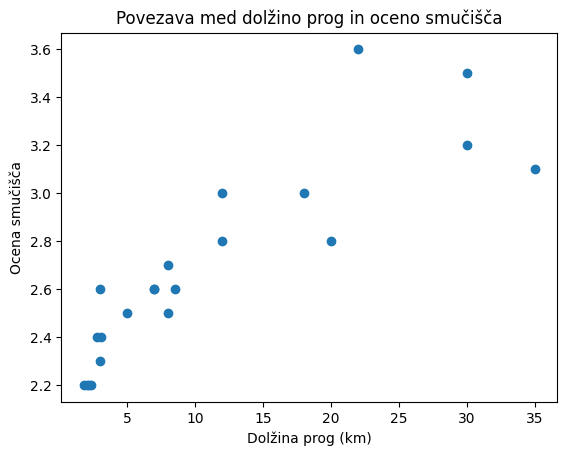

In [181]:
# narišimo scatter plot
plt.scatter(slovenska_smucisca['proge'], slovenska_smucisca['ocena'])
plt.title('Povezava med dolžino prog in oceno smučišča')
plt.xlabel('Dolžina prog (km)')
plt.ylabel('Ocena smučišča')
plt.show()

Povezava med tema podatkoma je vsaj delno vidna. Kjer je dolžina prog manjša od 10 kilometrov, so vse ocene smučišč pod 3. Pri večjih smučiščih pa so vidne tudi višje ocene, večinoma nad 3, z izjemo dveh z 2.8.

In [219]:
# Skupini po višinski razliki in izračunaj povprečje števila žičnic
povprecje_zičnic = slovenska_smucisca.groupby('višinska_razlika')['žičnice'].mean(numeric_only=True)

# Nariši graf
povprecje_zičnic.plot(kind='bar')
plt.title('Povprečje števila žičnic glede na višinsko razliko')
plt.xlabel('Višinska razlika (m)')
plt.ylabel('Povprečno število žičnic')
plt.show()



TypeError: Cannot use numeric_only=True with SeriesGroupBy.mean and non-numeric dtypes.

Ta stolpični prikaz daje podatke o spreminjaju števila žičnic glede na višinsko razliko. Kot je pričakovano, je z večjo višinsko razliko tudi več žičnic.

# <h2>2. Analiza številskih podatkov </h2>

# <h2>3. Grafični prikaz in razni izračuni</h2>